<a href="https://colab.research.google.com/github/zack-murray/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#creating sales dataset
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
#defining mean,variance,std function of my sales data
def mvstd(sales):
  m = sum(sales)/len(sales)      #m = mean, sum of sales divided by the length (total sales)
  v = sum([(m-i)**2 for i in sales])/(len(sales)-1) #v = variance, sum up squared differences of each item in list(sales) divided by sample pop(length/total sales)
  std = (sum([(m-i)**2 for i in sales])/(len(sales)-1))**0.5 #std = standard deviation, taking the sqrt of the variance

  return m, v, std
#create function that returns mean, variance, and std of my sales
m, v, std = mvstd(sales)         
print(m, v, std)

3052.714285714286 214387.90476190473 463.0204150595357


In [44]:
#Using pandas to check work
df = pd.DataFrame(data=sales)

print (df.mean())
print (df.var())
print (df.std())

0    3052.714286
dtype: float64
0    214387.904762
dtype: float64
0    463.020415
dtype: float64


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [112]:
customers = [127, 80, 105, 92, 120, 115, 93]

s_and_c = pd.DataFrame({"customers": [127, 80, 105, 92, 120, 115, 93], "sales": [3505, 2400, 3027, 2798, 3700, 3250, 2689]}) #created dictionary

df1 = pd.DataFrame(s_and_c)                        #wouldn't work without this method

df1.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762




---

###7604.357143 is the covariance between last week's sales and the number of customers.

---



## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [113]:
#Find std
print(s_and_c['customers'].var())
print(s_and_c['sales'].var())
print('\n')
print(s_and_c['customers'].std())
print(s_and_c['sales'].std())

290.95238095238096
214387.90476190473


17.057326313123664
463.0204150595357


In [114]:
#Find mean
def mean(data):
  return np.sum(data)/len(data)

print(mean(s_and_c['customers']))
print(mean(s_and_c['sales']))

104.57142857142857
3052.714285714286


In [116]:
#Find variance
def variance(data):
  x_bar = mean(data)
  distances = data - x_bar
  squared_distances = distances**2
  return np.sum(squared_distances)/(len(squared_distances)-1)

print(variance(s_and_c['customers']))
print(variance(s_and_c['sales']))

290.95238095238096
214387.90476190473


In [117]:
#Define std to work in covariance function
def std(data):
  return np.sqrt(variance(data))

print(std(s_and_c['customers']))
print(std(s_and_c['sales']))

17.057326313123664
463.0204150595357


In [118]:
#Find covariance
def cov(var1, var2):
  x_bar = mean(var1)
  y_bar = mean(var2)
  distances1 = var1 - x_bar
  distances2 = var2 - y_bar
  return np.sum(distances1*distances2)/ (len(var1) - 1)

cov(s_and_c['customers'], s_and_c['sales'])

7604.357142857142

In [0]:
#Defining covariance for correlation coefficient
covariance = cov(s_and_c['customers'], s_and_c['sales'])

In [121]:
#Find correlation coefficient
r = covariance / (std(s_and_c['customers']*std(s_and_c['sales'])))

r  # A strong positive correlation

0.9628339778148908

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [60]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
#import data and check for numeric columns
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [62]:
#Calculate the variance-covariance matrix
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [63]:
#Calculate the correlation matrix
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

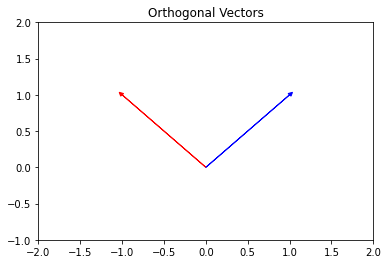

In [69]:
vector1 = [-1, 1]
vector2 = [1, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector1[0], vector1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector2[0], vector2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-2,2)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()



---

###Perpendicular is a synonym for orthogonal, the two vectors come together to make a right angle.

---



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [70]:
#Calculating dot function 
a1 = [-5, 3, 7]
b1 = [6, -8, 2]

np.vdot(a, b)

-40



---

###No, vector a and vector b are not orthogonal. Vectors are only orthogonal if their dot product equals zero, a & b's dot product is -40. 

---



## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [78]:
c = np.array([2, -15, 6, 20])
#Use numpy linalg.norm to find the vector norm, then square it
c1 = (np.linalg.norm(c))**2
#Use numpy dot to find dot product
c2 = (np.dot(c, c))
#Use numpy matmul to multiply transposed c with c 
c3 = np.matmul(c.T, c)
print(c1)
print(c2)
print(c3)

665.0
665
665


##What do these quantities have in common?

---

All of the calculations come to the same conclusion

---



# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
#data gets pulled out to be used as scalars, matrices become identity matrices

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\\

\begin{align}
e= \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}= 2 \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix}-8 \begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{k} + 11\hat{l}- 8\hat{m}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [79]:
f = [4, 12, 11, 9, 2]
#first calculate the norm
fnorm = np.linalg.norm(f)
#turn f into a unit vector by dividing it by its norm
fuvector = (f/fnorm)
print(fuvector)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

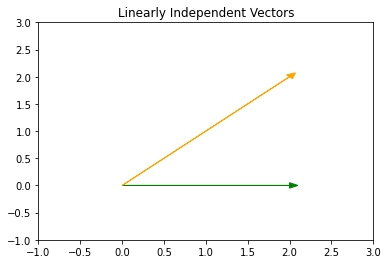

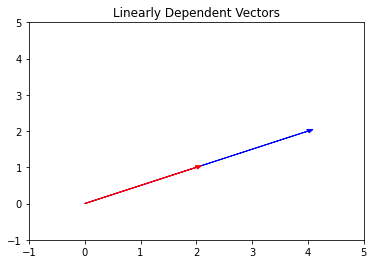

In [95]:
w = [2,0]
x = [2,2]
y = [2,1]
z = np.multiply(2, y)  #scaled vector to keep on same line

plot1 = plt.figure(1)
plt.title("Linearly Independent Vectors")
plt.arrow(0,0, w[0],w[1], head_width = 0.1, head_length = 0.1, color = 'green')
plt.arrow(0,0, x[0],x[1], head_width = 0.1, head_length = 0.1, color = 'orange')
plt.xlim(-1, 3)
plt.ylim(-1, 3)

plot2 = plt.figure(2)
plt.title("Linearly Dependent Vectors")
plt.arrow(0,0, z[0],z[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.arrow(0,0, y[0],y[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [96]:
g = [1, 2]
h = [4, 8]
a,b = (2,3)
#linear combination using multiply
linear_combo= np.multiply(g, a) + np.multiply(h, b)
print(linear_combo)

[14 28]





---

Our new vector lies on the same line as g and h, they are linearly dependent. The span of the vectors is the line that they lie on, since that's what can be produced by scaling and composing them together. 

---



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [97]:
lmn = ([1, 2, 3], [-1, 0, 7], [4, 8, 2])
#Linalg.matrix_rank will provide us with our dimensions
np.linalg.matrix_rank(lmn)

3

The rank of this matrix is a 3, meaning that all vectors are linearly independent, and span 3 dimensional space. 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



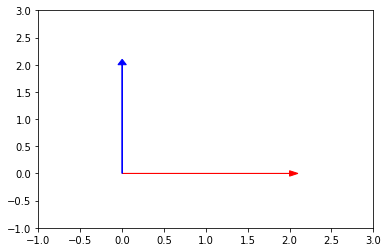

In [131]:
onevector = [2,0]
twovector = [0,2]


f1 = plt.figure(1)
plt.arrow(0,0, onevector[0], onevector[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, twovector[0], twovector[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis means that the vectors are linearly independent and span vector space V. For example, the unit vectors in the plot above form a basis for the vector space $\mathbb{R}^2$ becayse they are linearly independent and span that space.


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [132]:
p = np.matrix([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
#like scan, use linalg.matrix_rank to find rank of p
print(np.linalg.matrix_rank(p))

3


## 7.2 What does the rank of a matrix tell us?



---

The rank tells us that the matrix spans 3 dimensions

---



# Stretch Goal

#Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)



## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

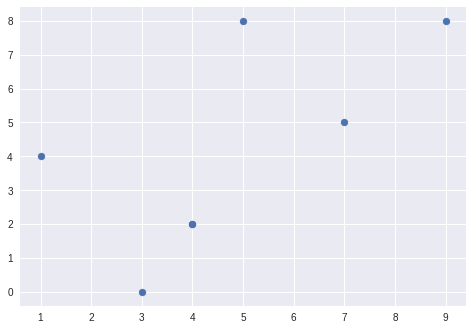

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()